


## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Unique users converted
#df.query("converted == 1").user_id.nunique() / df.user_id.nunique()
# 0.12104245244060237

df['converted'].mean()

0.11965919355605512

In [6]:
# Show unique valuess for landing_page attribute
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [7]:
# Show unique valuess for group attribute
df.group.unique()

array(['control', 'treatment'], dtype=object)

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# We will need to query 2 variations (new_page / control), (old_page / treatment)
# For the rows where treatment is not aligned with new_page or control is not aligned with old_page

mismatch_df = df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page == 'old_page') & (df.group == 'treatment'))]

# show mismatch_df dataframe count
mismatch_df.shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[((df.landing_page == 'new_page') & (df.group == 'treatment')) | ((df.landing_page == 'old_page') & (df.group != 'treatment'))]

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

In [13]:
#  total records in df2
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
#  show both records for duplicated user_ids
df2[df2.duplicated('user_id', keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#  Remove one of the rows with a duplicate user_id
df2 = df2.drop_duplicates(['user_id'])

#check if there is still duplicate
df2[df2.duplicated('user_id')].user_id.count()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
con_control = df2.query("group == 'control'").converted.mean()
con_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
con_treatment = df2.query("group == 'treatment'").converted.mean()
con_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Is there an evidence that one page leads to more conversions?**

1. the convertion rate in the control group is higher than the conversion rate in the treatment group, but with very little diffrences.

2. We can't decide the old page leads more conversions because of this little diffrence, so those two pages have almost similar performance.

3. The probability of an user recieved the new page is 50% which means that the diffrence in the conversion rate is between the same amount of traffic for each group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$ H_0 :  P_{new} - P_{old} <= 0 $$

$$ H_1 : P_{new} - P_{old} > 0 $$



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# convert rate for  𝑝𝑛𝑒𝑤  under the null equal to df2 converted rate
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# convert rate for  𝑝𝑜𝑙𝑑  under the null equal to df2 converted rate
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
# New treatment group
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
# Old control group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([1,0], n_new, p=[p_new, (1-p_new)])
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([1,0], n_old, p=[p_old, (1-p_old)])
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean() - old_page_converted.mean()

0.0005965806836691345

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    old_page_converted = np.random.choice([1,0], n_old, p = [p_old, (1-p_old)]).mean()
    new_page_converted = np.random.choice([1,0], n_new, p = [p_new, (1-p_new)]).mean() 
    p_diffs.append(new_page_converted - old_page_converted)

    # convert to numpy array to be used in histogram
p_diffs = np.array(p_diffs)

# show p_diffs
p_diffs

array([ 3.21829259e-05,  2.73095035e-04, -2.70757823e-04, ...,
       -3.66985896e-04,  5.55438018e-04,  1.09912204e-03])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

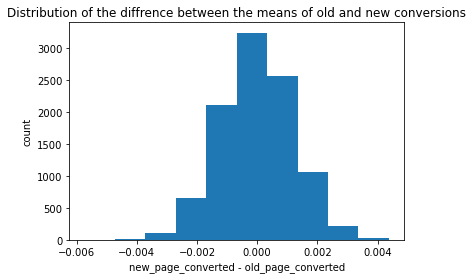

In [29]:
plt.hist(p_diffs)
plt.title('Distribution of the diffrence between the means of old and new conversions')
plt.xlabel('new_page_converted - old_page_converted')
plt.ylabel('count');

In [30]:
# observed diffrence in the data set
obs_diff = con_treatment - con_control
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# p-value is the probability of the observing statistic given that null hypothesis is true 
(p_diffs > obs_diff).mean()

0.9056

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j, we computed the probability of the observing statistic if the null hypothesis is true (p-value), if p-value is higher than type I error threshold accepted (alpha), the old page's performance is equal to or better the new page or the same, and if it is very low (less than the type I error threshold), the new page's performance is better than the old one.**

**we find that the p-value equals to .904 which is high enough and more than .05 (which is the alpha value), so we fail to reject the null hypothesis, and make a decision that the old page's performance is better than or the same as the new page's performance**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

# show z-score and p-value
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**First of all we will calculate the percentage of the z-score using `Cumulative density Function` , and then the critical value at `0.05` type I error rate using `Percent point function`.**

In [57]:
from scipy.stats import norm

#  percentage of the significance of z-score
print('z-score: {}'.format(norm.cdf(z_score)))

# Critical value at 95% confidence is,
# meaning the type I error rate equal to 5%
print('critical value: {}'.format(norm.ppf(1-0.05)))

z-score: 0.9050583127590245
critical value: 1.6448536269514722


In the z-test hypothesis testing, we calculated the critical value and the z-score to see wether the z-score is less than or more than the critical value, that if the z-score is less than the critical value means that we fail to reject the null hypothesis, anf if it is more than the critical value means we can reject the null hypothesis, in our status here we see that the z-score is less than the critical value, which means **we fail to reject the null hypothesis** and make a decision that the old page's converted rate is better than or equal to the new page's converted rate.

**They agree with the finding in j and k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

we are predicting a categorical response, so we will be using **` Logistic regression `**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# create an intercept column with default value 1
df2['intercept'] = 1

# create dummy variable column (ab_page) for which page each user received
# it will have 1 if df['landing_page'] is equal to 'new_page'
df2 = df2.join(pd.get_dummies(df['group']))
df2.drop('control', axis=1, inplace=True)
df2.rename({'treatment': 'ab_page'}, axis=1, inplace = True)

In [35]:
df2.head(6)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# fit logistic regression model
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results_lr = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
#  print summary of the logist
results_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        00:16:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
# exponentiate the coefficients before we can interpret them in logistic regression

np.exp(results_lr.params)


intercept    0.136863
ab_page      0.985123
dtype: float64

In [39]:
1 / 0.985123

1.0151016675075093

Users uses the old page is **1.015** times more likely to make a conversion than if he uses the new page holding all other factors constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**the P-value associated with ab_page equals to .19.
It is diffrent from the p-value in the part II, that the hypothesises for null and alternative here are diffrent. Because we creates dummy variable ab_page that refers to new_page, then the baseline is the old page, and we can know the relashionsip comparing to the baseline.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are a lot of factors taht might influence conversion of the user other than page look and feel, and those factors shall be taken into consideration in the regression model, some and not limited to is (Page speed, referred channel, user age, page size, time of visit, country of the visit, and a lot more...)**

**Adding addtional factors to our regression model has disadvantages, the most disadvantage to take care of is Multicollinearity(that these factors may be correlated to one another) and if the linear relationship exists or not.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# df_new.shape

In [41]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
### Create the necessary dummy variables for country and add them to the new dataframe
dumm_country = pd.get_dummies(df_new['country'])
df_new = df_new.join(dumm_country)

In [43]:
# set intercept
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [44]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page']])
results_log2 = lm.fit()

results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        00:16:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [45]:
np.exp(results_log2.params)

intercept    0.136795
CA           0.960062
UK           1.009932
ab_page      0.985168
dtype: float64

In [46]:
# reciprocal values
1 / np.exp(results_log2.params)

intercept    7.310207
CA           1.041599
UK           0.990165
ab_page      1.015056
dtype: float64

We can interpret the result like this:

1. If user is from CA , it is **1.04 less likely** to make a conversion than if he is from US, holding all other variables constant.

2. If user is from UK , it is **1.009 more likely** to make a conversion than if he is from US, holding all other variables constant.

3. if user lands on the new page, it is **1.015 less likely** to make a conversion than if he uses the old page, holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
# create the interaction model between the page and country
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,ab_US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [49]:
# create a logistic model with X as independent variables, and y as dependent one.
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'CA', 'ab_UK', 'ab_CA']])
results_4 = logit_mod.fit()
results_4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        00:16:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [50]:
np.exp(results_4.params)

intercept    0.137178
ab_page      0.979646
UK           0.994272
CA           0.982625
ab_UK        1.031896
ab_CA        0.954198
dtype: float64

In [51]:
# reciprocal values
1 / np.exp(results_4.params)

intercept    7.289813
ab_page      1.020776
UK           1.005761
CA           1.017682
ab_UK        0.969090
ab_CA        1.048001
dtype: float64

We can interpret the result like this:


1. If user is from CA , it is **0.98 more likely** to make a conversion than if he is from US, holding all other variables constant.

2. If user is from UK , it is **0.99 more likely** to make a conversion than if he is from US, holding all other variables constant.

3. if user lands on the new page, it is **0.98 more likely** to make a conversion than if he uses the old page, holding all other variables constant.

we can conclude that there is no significan effect introduced by the interaction between the country and new page treatment.



<a id='conclusions'></a>
## Conclusions

In this project, we applied 3 different ways to identify which page has better performace, our predictor was the converted rate, we used the following methods 1. the probability, 2. hypothesis testing, and 3. the regression models, all of those three ways indicate that the performace of the old page is better than the new one but with a slight diffrences, so we can make a decision to keep the old page and reject the new one. 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.